In [200]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

## Importing data

In [201]:
df = pd.read_csv("consumption_temp.csv")
df.head()

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


## Analysis

### Descriptive statistics and Distribution

In [202]:
# Temperature description
print("Temperature description")
display(df[["temperature", "location"]].groupby("location").describe())

# Consumption description
print("Consumption description")
display(df[["consumption", "location"]].groupby("location").describe())

Temperature description


temperature                                                 \
                  count      mean       std        min  25%  50%   75%   
location                                                                 
bergen           8641.0  7.750237  6.556976 -15.600000  3.1  8.1  12.2   
helsingfors      6289.0  5.662903  7.592141 -10.100000 -0.3  3.1  11.6   
oslo             8641.0  7.392883  8.770901 -15.400000  0.9  7.9  14.2   
stavanger        8641.0  8.547795  5.839943  -9.200000  4.3  8.9  12.7   
tromsø           8641.0  3.514119  7.967161 -14.600000 -2.6  2.8   9.6   
trondheim        8641.0  6.213621  7.616749 -17.299999  1.1  6.5  11.6   

                        
                   max  
location                
bergen       29.299999  
helsingfors  24.000000  
oslo         29.799999  
stavanger    27.000000  
tromsø       29.799999  
trondheim    30.500000

Consumption description


consumption                                                    \
                  count      mean       std       min       25%       50%   
location                                                                    
bergen           8641.0  1.876716  1.156034  0.443192  0.834003  1.380962   
helsingfors      6289.0  6.077242  0.919462  0.000000  6.189000  6.354000   
oslo             8641.0  6.876428  4.672634  1.520560  2.610569  4.871180   
stavanger        8641.0  3.304703  2.112962  0.832372  1.382764  2.390667   
tromsø           8641.0  1.340776  0.559151  0.372637  0.831883  1.195308   
trondheim        8641.0  2.278574  1.137311  0.620001  1.263027  1.841736   

                                   
                   75%        max  
location                           
bergen        2.998324   4.650816  
helsingfors   6.474000   7.860000  
oslo         11.458471  18.045011  
stavanger     5.398822   8.763147  
tromsø        1.874898   2.552159  
trondheim     3.376217   5.099158

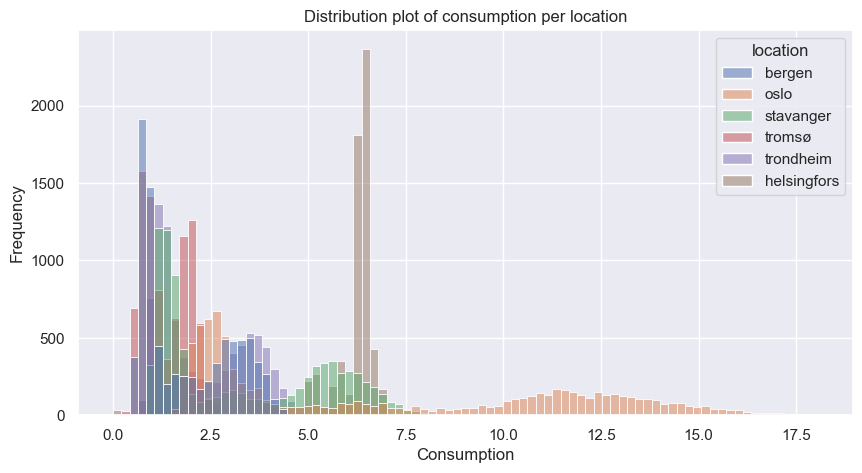

In [203]:
# Distribution plot of consumption per location

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=df, x="consumption", hue="location", ax=ax)

ax.set_title("Distribution plot of consumption per location")
ax.set_xlabel("Consumption")
ax.set_ylabel("Frequency")

plt.show()


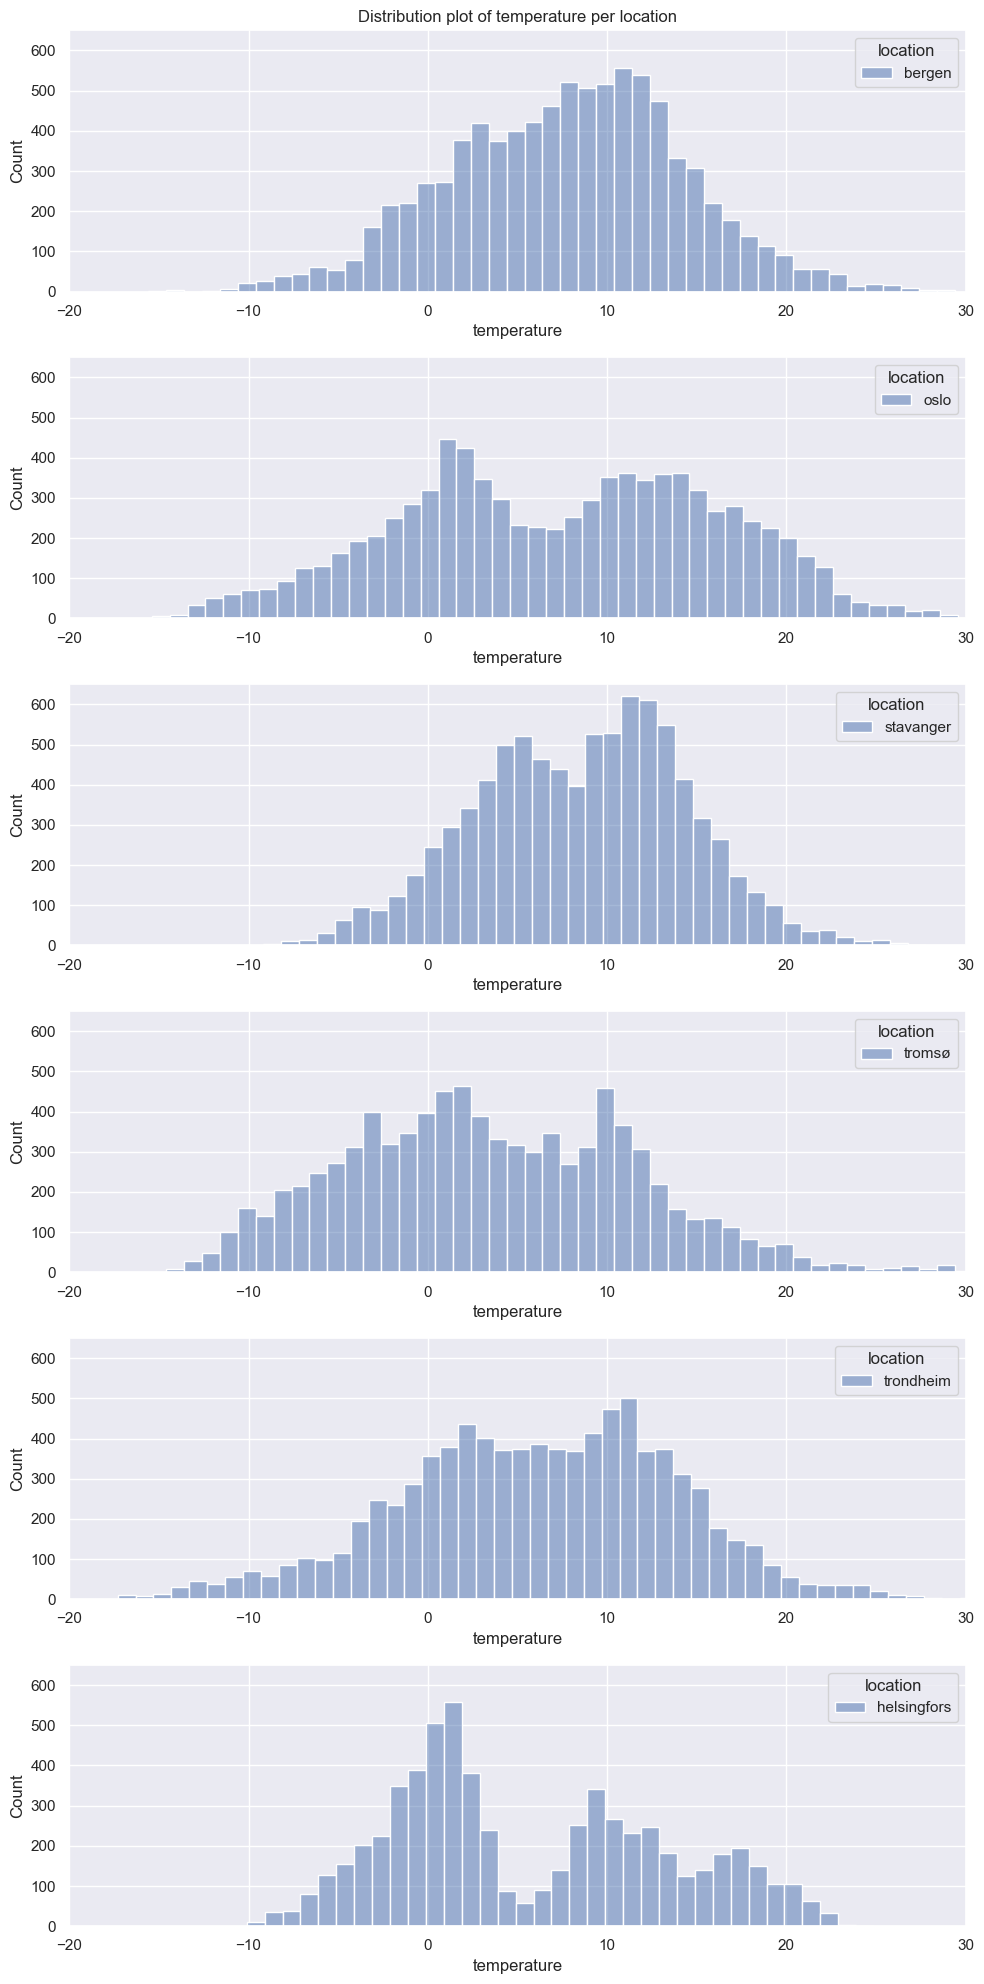

In [204]:
# Distribution plot of temperature per location

num_locations = df["location"].nunique()
fig, ax = plt.subplots(figsize=(10, 20), nrows=num_locations)

ax[0].set_title("Distribution plot of temperature per location")

for i, location in enumerate(df["location"].unique()):
    sns.histplot(data=df[df.location == location], x="temperature", hue="location", binwidth=1, ax=ax[i])
    ax[i].set_xlim(-20, 30)
    ax[i].set_ylim(0, 650)


fig.tight_layout()
plt.show()


In [205]:
# Correlation between consumption and temperature per location

df.groupby("location")[["consumption", "temperature"]].corr()

consumption  temperature
location                                         
bergen      consumption     1.000000    -0.781353
            temperature    -0.781353     1.000000
helsingfors consumption     1.000000    -0.567863
            temperature    -0.567863     1.000000
oslo        consumption     1.000000    -0.861854
            temperature    -0.861854     1.000000
stavanger   consumption     1.000000    -0.781747
            temperature    -0.781747     1.000000
tromsø      consumption     1.000000    -0.863436
            temperature    -0.863436     1.000000
trondheim   consumption     1.000000    -0.837779
            temperature    -0.837779     1.000000

Helsingfors has lowest correlation

### Data Quality

In [206]:
# Find missing values

print("Missing values")
display(df.isna().sum())

Missing values


time           0
location       0
consumption    0
temperature    0
dtype: int64

In [207]:
# Find duplicates

print("Duplicates")
display(df.duplicated().sum())

Duplicates


0

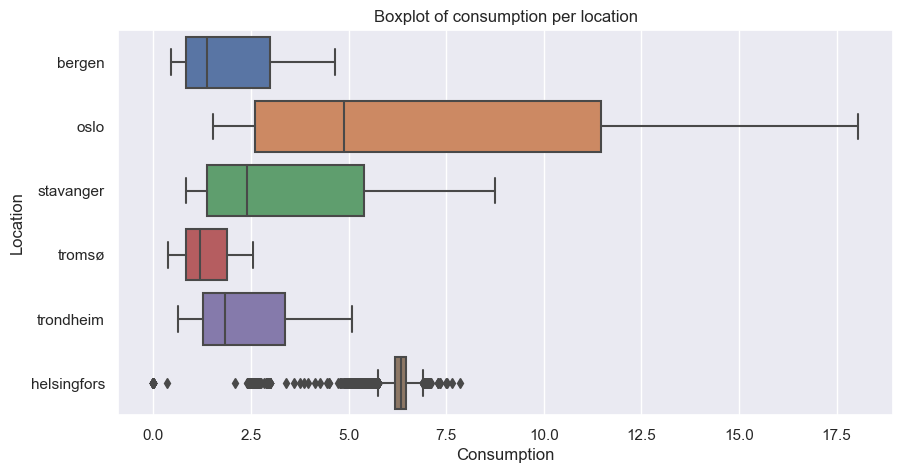

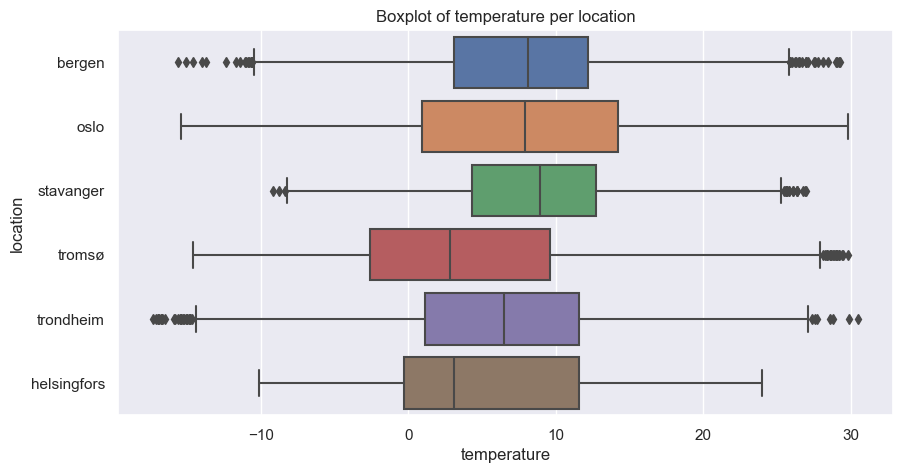

In [208]:
# Find outliers of consumption

fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df, x="consumption", y="location", ax=ax)

ax.set_title("Boxplot of consumption per location")
ax.set_xlabel("Consumption")
ax.set_ylabel("Location")

plt.show()

# Find outliers of temperature

fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df, x="temperature", y="location", ax=ax)

ax.set_title("Boxplot of temperature per location")

plt.show()

## Feature engineering

### Time Features

In [209]:
clean = df.copy()

In [210]:
# Add time features to dataset

df["time"] = pd.to_datetime(df["time"])
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["hour"] = df["time"].dt.hour
df["weekday"] = df["time"].dt.weekday
df["weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)

df

,time,location,consumption,temperature,year,month,day,hour,weekday,weekend
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,2022,4,7,21,3,0
1,2022-04-07 21:00:00,oslo,4.092830,1.0,2022,4,7,21,3,0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,2022,4,7,21,3,0
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,2022,4,7,21,3,0
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,2022,4,7,21,3,0
...,...,...,...,...,...,...,...,...,...,...
49489,2023-04-02 21:00:00,helsingfors,6.333000,-1.1,2023,4,2,21,6,1
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1,2023,4,2,21,6,1
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5,2023,4,2,21,6,1
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5,2023,4,2,21,6,1


### Location engineering

In [211]:
# One hot encode location

locations = df["location"].unique()
df[locations] = pd.get_dummies(df["location"]).astype(int)

df

,time,location,consumption,temperature,year,month,day,hour,weekday,weekend,bergen,oslo,stavanger,tromsø,trondheim,helsingfors
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,2022,4,7,21,3,0,1,0,0,0,0,0
1,2022-04-07 21:00:00,oslo,4.092830,1.0,2022,4,7,21,3,0,0,0,1,0,0,0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,2022,4,7,21,3,0,0,0,0,1,0,0
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,2022,4,7,21,3,0,0,0,0,0,1,0
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,2022,4,7,21,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49489,2023-04-02 21:00:00,helsingfors,6.333000,-1.1,2023,4,2,21,6,1,0,1,0,0,0,0
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1,2023,4,2,21,6,1,0,0,1,0,0,0
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5,2023,4,2,21,6,1,0,0,0,1,0,0
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5,2023,4,2,21,6,1,0,0,0,0,1,0


### Holiday engineering

In [188]:
# Add holiday flag

# Import holidays data
with open('helligdager2022.json') as data_file:    
    holidays_2022 = json.load(data_file)

with open('helligdager2023.json') as data_file:    
    holidays_2023 = json.load(data_file)  

holidays_2022 = pd.json_normalize(holidays_2022, 'data')
holidays_2023 = pd.json_normalize(holidays_2023, 'data')

holidays_2023["time"] = pd.to_datetime(holidays_2023["date"])
holidays_2022["time"] = pd.to_datetime(holidays_2022["date"])

# Merge into df
data = df.copy()

data["is_holiday"] = np.logical_or(
    np.isin(
        pd.to_datetime(data["time"]).dt.date, pd.to_datetime(holidays_2022["time"]).dt.date
    ),
    np.isin(
        pd.to_datetime(data["time"]).dt.date, pd.to_datetime(holidays_2023["time"]).dt.date
    ),
).astype(int)

df["is_holiday"] = data["is_holiday"]

### Drop things

In [193]:
# Drop location column
df = df.drop(columns=["location", "time"], errors="ignore")

# Drop helsingfors
df = df[~(df["helsingfors"] == 1)].drop(columns=["helsingfors"], errors="ignore")

### Feature scaling

In [194]:
# Scale features

scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

df

,consumption,temperature,year,month,day,hour,weekday,weekend,bergen,oslo,stavanger,tromsø,trondheim,is_holiday
0,0.061697,0.337004,0.0,0.272727,0.200000,0.913043,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.226812,0.365639,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.114040,0.372247,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.069082,0.257709,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.058206,0.343612,0.0,0.272727,0.200000,0.956522,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49488,0.173273,0.383260,1.0,0.272727,0.033333,0.913043,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
49489,0.350956,0.319383,1.0,0.272727,0.033333,0.913043,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
49490,0.672466,0.319383,1.0,0.272727,0.033333,0.913043,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
49491,0.311600,0.354626,1.0,0.272727,0.033333,0.913043,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Correlation Analysis

Text(0, 0.5, 'Holiday')

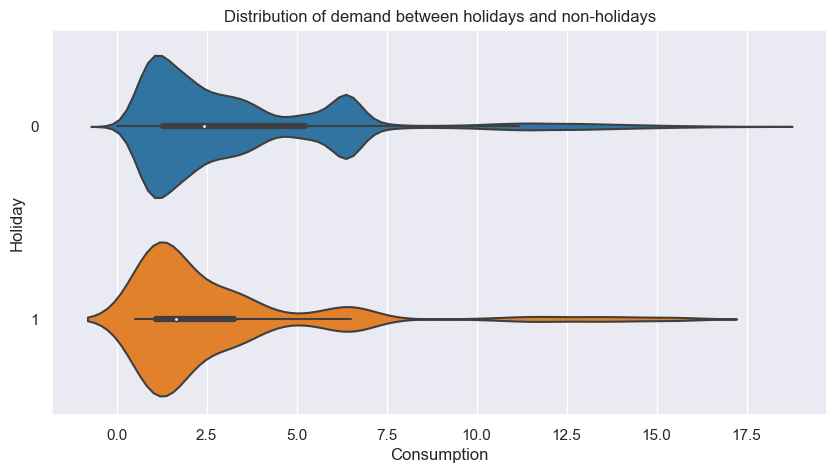

In [195]:
plot_data = data.copy()
# plot_data = plot_data[plot_data.location.isin(["trondheim"])]

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x="consumption",
    y="is_holiday",
    data=plot_data.assign(is_holiday=plot_data.is_holiday.astype(str)),
    palette="tab10",
    ax=ax,
)
ax.set_title("Distribution of demand between holidays and non-holidays")
ax.set_xlabel("Consumption")
ax.set_ylabel("Holiday")

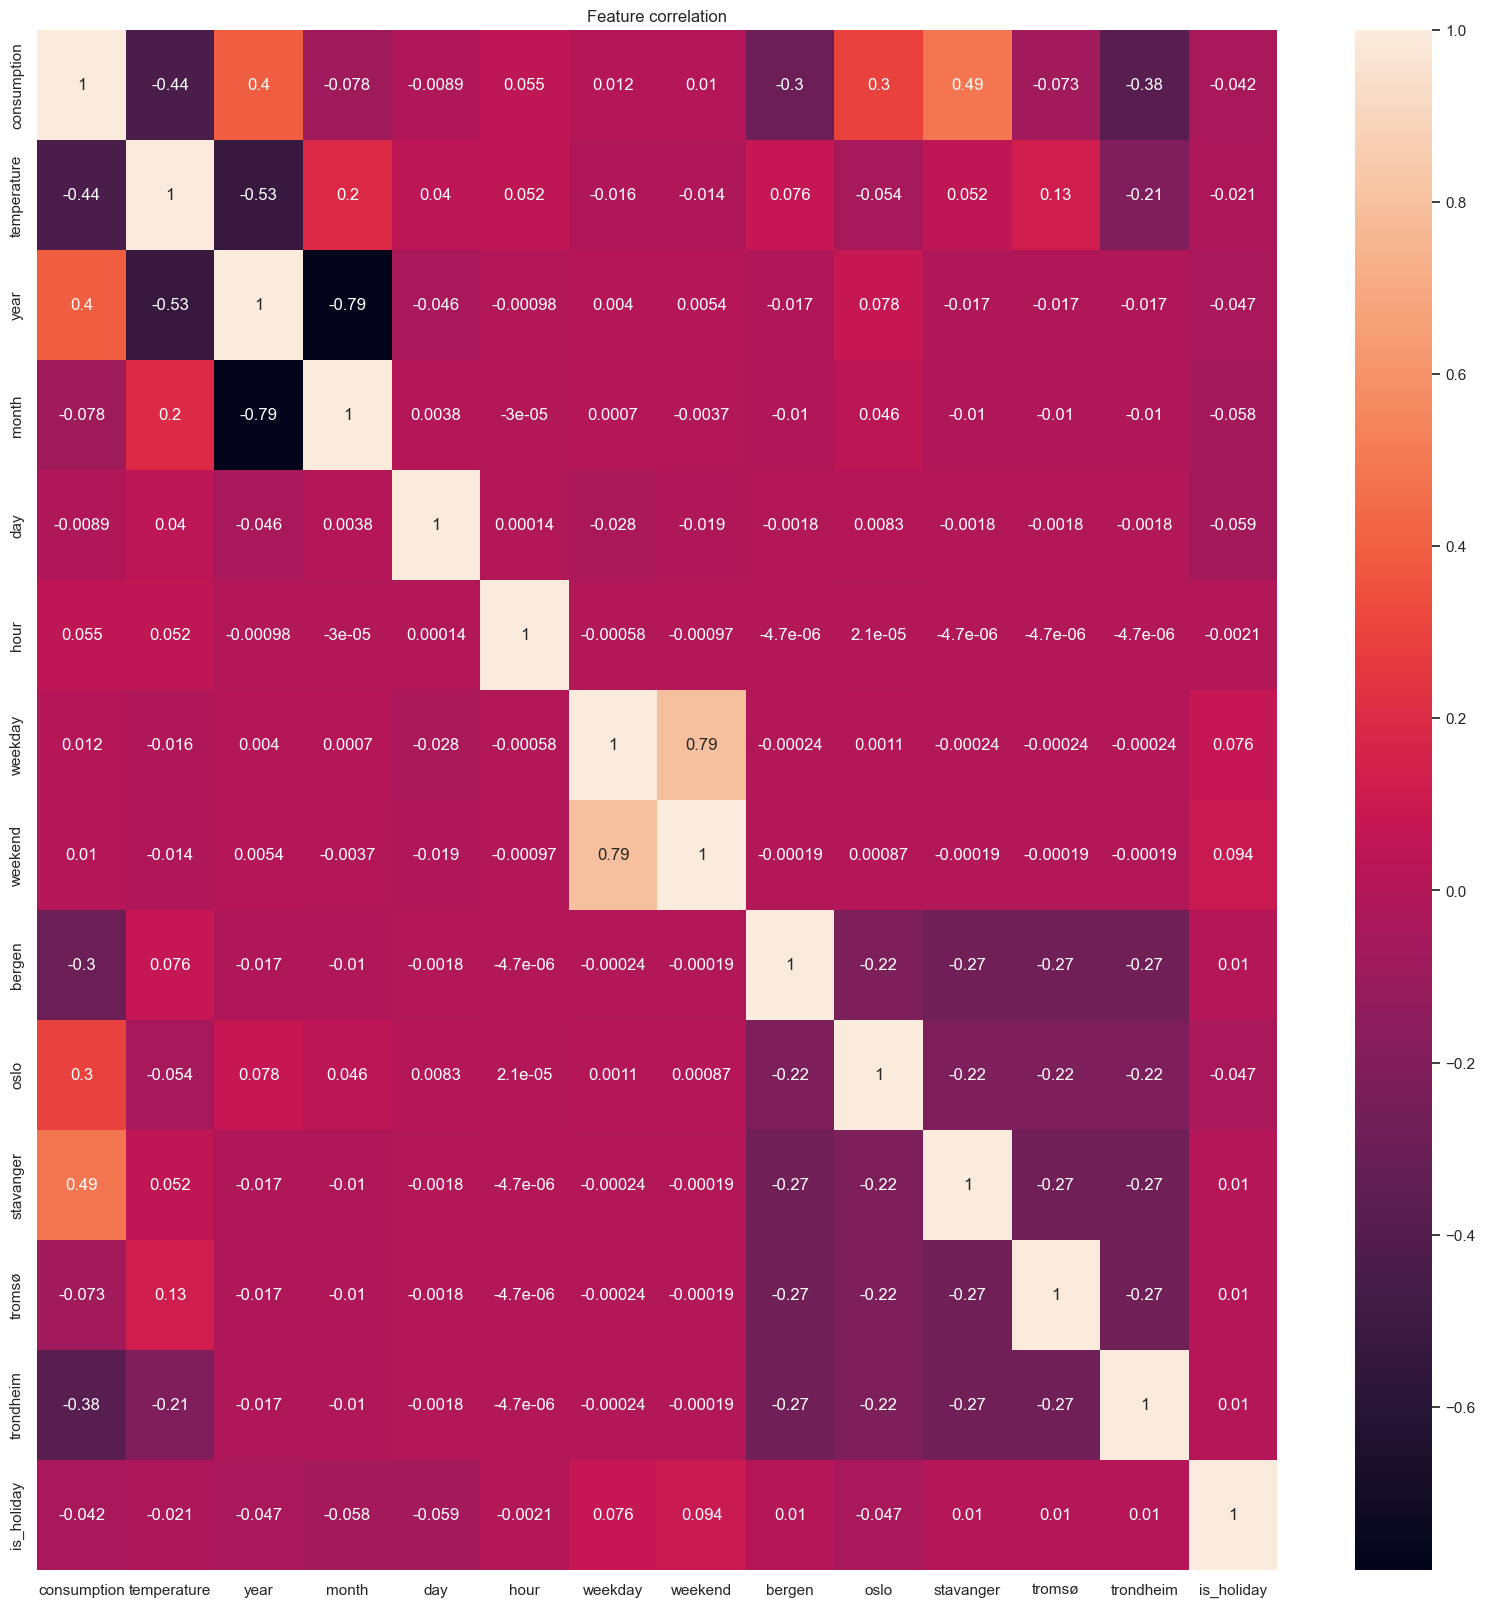

In [196]:
# Feature correlation

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, ax=ax)
ax.set_title("Feature correlation")

plt.show()


## Modelling

In [199]:
# Oslo Model
data_oslo = data[data.location == 1].copy()
data_oslo = data_oslo.drop(columns=["location", "oslo"], errors="ignore")

,time,location,consumption,temperature,year,month,day,hour,weekday,weekend,bergen,oslo,stavanger,tromsø,trondheim,helsingfors,is_holiday
11761,2022-07-14 21:00:00,helsingfors,0.000,15.8,2022,7,14,21,3,0,0,1,0,0,0,0,0
11767,2022-07-14 22:00:00,helsingfors,0.000,15.4,2022,7,14,22,3,0,0,1,0,0,0,0,0
11773,2022-07-14 23:00:00,helsingfors,0.000,15.5,2022,7,14,23,3,0,0,1,0,0,0,0,0
11779,2022-07-15 00:00:00,helsingfors,0.000,15.3,2022,7,15,0,4,0,0,1,0,0,0,0,0
11785,2022-07-15 01:00:00,helsingfors,0.000,14.8,2022,7,15,1,4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49465,2023-04-02 17:00:00,helsingfors,6.325,0.9,2023,4,2,17,6,1,0,1,0,0,0,0,1
49471,2023-04-02 18:00:00,helsingfors,6.346,0.0,2023,4,2,18,6,1,0,1,0,0,0,0,1
49477,2023-04-02 19:00:00,helsingfors,6.345,-0.6,2023,4,2,19,6,1,0,1,0,0,0,0,1
49483,2023-04-02 20:00:00,helsingfors,6.340,-1.2,2023,4,2,20,6,1,0,1,0,0,0,0,1


---------

In [41]:
ohe = OneHotEncoder()
locations = df["location"].unique()

df[locations] = pd.get_dummies(df["location"]).astype(int)
df["time"] = pd.to_datetime(df["time"])


In [42]:
t = df.isna()


In [43]:
df['time'].dt.hour.values

array([21, 21, 21, ..., 21, 21, 21], dtype=int32)

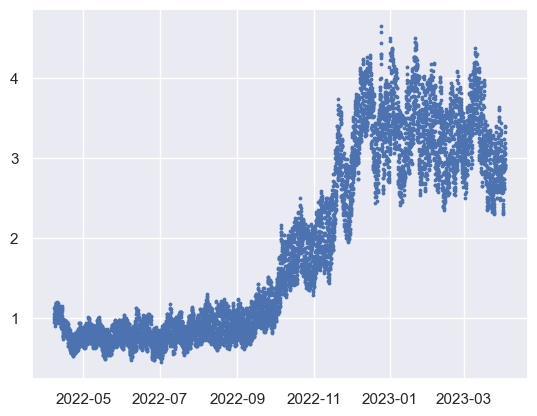

In [44]:
plot_data = df[df["location"] == "bergen"].copy()

plt.scatter(plot_data['time'], plot_data['consumption'].values, s=3)

In [45]:
df[df["consumption"] == 0 ]


,time,location,consumption,temperature,bergen,oslo,stavanger,tromsø,trondheim,helsingfors
11761,2022-07-14 21:00:00,helsingfors,0.0,15.800000,0,1,0,0,0,0
11767,2022-07-14 22:00:00,helsingfors,0.0,15.400000,0,1,0,0,0,0
11773,2022-07-14 23:00:00,helsingfors,0.0,15.500000,0,1,0,0,0,0
11779,2022-07-15 00:00:00,helsingfors,0.0,15.300000,0,1,0,0,0,0
11785,2022-07-15 01:00:00,helsingfors,0.0,14.800000,0,1,0,0,0,0
11791,2022-07-15 02:00:00,helsingfors,0.0,14.900000,0,1,0,0,0,0
11797,2022-07-15 03:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11803,2022-07-15 04:00:00,helsingfors,0.0,14.600000,0,1,0,0,0,0
11809,2022-07-15 05:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11815,2022-07-15 06:00:00,helsingfors,0.0,14.100000,0,1,0,0,0,0


## Visualize dataset

In [46]:
def draw(data:pd.DataFrame, x:str, y:str, hue:str):
    sns.set_theme(style="darkgrid")
    plot = sns.lineplot(x=x, y=y, hue=hue, data=data)
    new_xticklabels = [item.get_text()[:10] for item in plot.get_xticklabels()]
    plot.set_xticks(plot.get_xticks())
    plot.set_xticklabels(new_xticklabels)
    plot.xaxis.set_major_locator(ticker.LinearLocator(10))
    plt.xticks(rotation=12)
    plt.tight_layout()

data_consumption = df.drop(columns=["temperature"])
data_temp = df.drop(columns=["consumption"])

### Consumption versus time

The low correlation between temperature and consumption in Helsingfors is reflected in the plot.

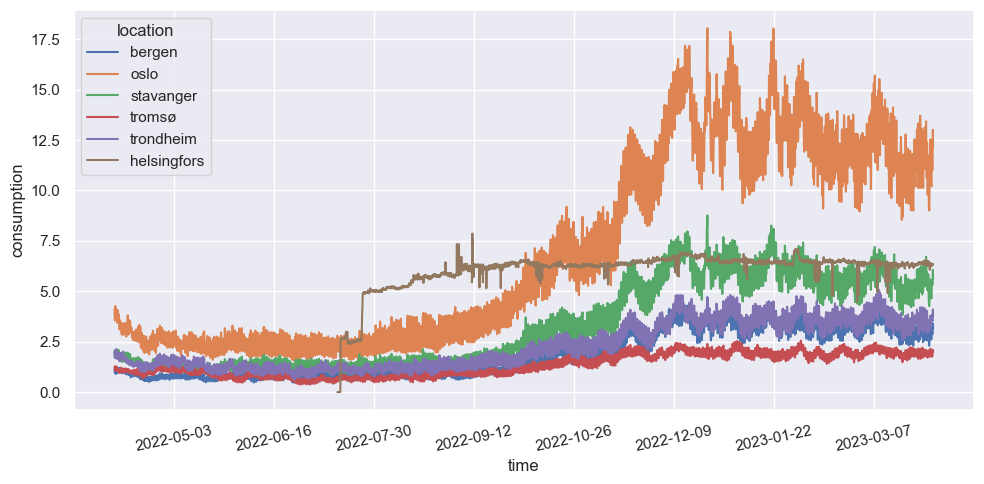

In [47]:
plt.figure(figsize=(10, 5))
draw(data_consumption, "time", "consumption", "location")

### Temperature versus time

Temperature follows the same trend in all locations.

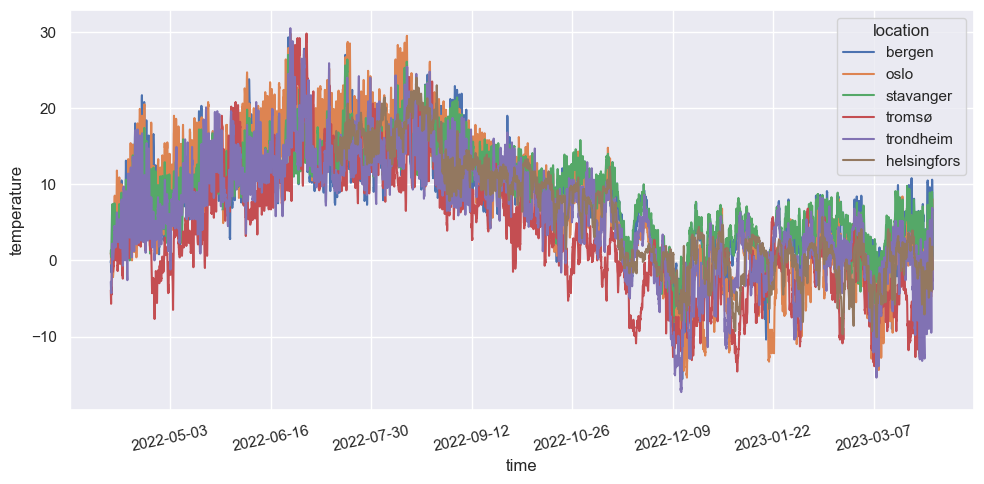

In [48]:
plt.figure(figsize=(10, 5))
draw(data_temp, "time", "temperature", "location")

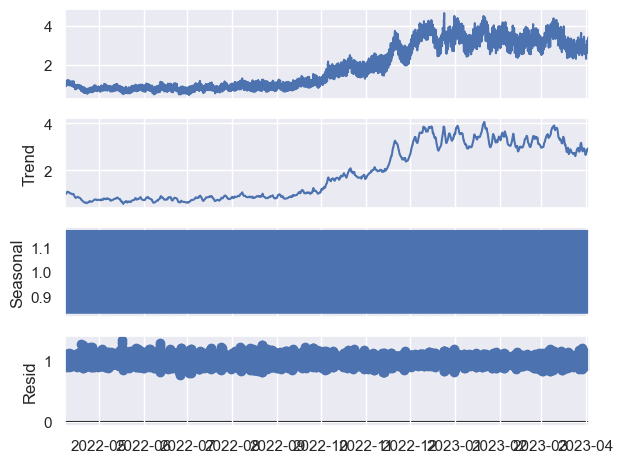

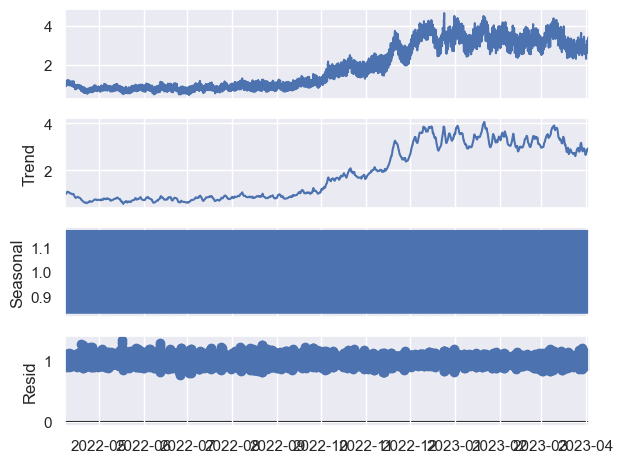

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

plot_data = df[df["location"] == "bergen"].copy().set_index('time')

analysis = plot_data[['consumption']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()